## Assignment 2

In [1]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy import linalg
import scipy.optimize as spo
random.seed(1)


The formula for the logistic function $\sigma:\mathbb{R}\times \mathbb{R}^2\rightarrow \mathbb{R}$ is the following:
$$\sigma(x,\beta_1,\beta_2)=\frac{1}{1+e^{-\beta_1(x-\beta_2)}}
$$
Here $\beta_1$ and $\beta_2$ are two positive constants:
* $\beta_1$: controls the curve's steepness,
* $\beta_2$: slides the curve on the x-axis.



In [2]:
#### GRADED EXERCISE
# Define the function sigma
# input (x,beta_1,beta_2)
# output value of the corresponding logistic function


def sigma(x,beta_1,beta_2):
    # YOUR CODE HERE
    return 1/(1+np.exp(-beta_1*(x-beta_2)))


Test your function. Try to calculate <code>sigma(2,1,1)</code>. This should have value 0.7310585786300049.

In [3]:
assert(np.allclose(sigma(2,1,1),0.7310585786300049))


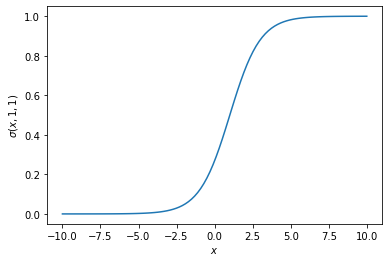

In [4]:
xvalues = np.linspace(-10,10,100)
yvalues = sigma(xvalues,1,1)

plt.plot(xvalues,yvalues)

plt.ylabel('$\sigma(x,1,1)$')
plt.xlabel('$x$')
plt.show()



So -- if you did well -- here is the graph of your logistic function for given $\beta=(1,1)$. You may also experiment with other values of $\beta_1,\beta_2$. 

Now consider the following situation. We know that the functional relationship between $x$ and $y$ is given by the logistic function $\sigma$, but we don't know the true $\beta_1$ and $\beta_2$. And what is even more disturbing, is that for given inputs $x$ we are given only inaccurate measurements $\sigma(x,\beta_1,\beta_2)$. This means that instead of $\sigma(x,\beta_1,\beta_2)$ we are given $\sigma(x,\beta_1,\beta_2)+\epsilon$ where $\epsilon$ is some random noise term. 

Find below the relevant data of $(x,y)$ values as summarized by <code>xdata</code> and <code>ydata</code>. These are lists. 

In [5]:
xdata=[ 0.26317961,  1.11033334,  2.16854045,  3.5879149 ,  7.39188879,
        8.27959386,  9.68184107, 11.00765078, 11.21504832, 14.12793326,
       15.57773256, 15.65724246, 16.84769716, 18.02335252, 19.13588775,
       20.43868663, 20.77180401, 21.29145905, 21.41469248, 21.43979042,
       24.97597543, 25.5751027 , 26.48366552, 27.20930143, 28.24374732,
       28.69837527, 29.1895221 , 30.44852441, 30.55106613, 30.71421093,
       30.75885892, 31.49290224, 31.53961788, 31.56541318, 31.96907739,
       36.36844079, 36.68593186, 38.49091299, 42.46127101, 42.83352138,
       43.65627717, 43.95391022, 44.59528147, 45.34353145, 48.98077847,
       49.15571848, 49.74482786, 52.90872105, 52.96573206, 54.11208861,
       54.75745599, 55.65916591, 56.5631469 , 57.13211501, 57.36438576,
       57.42833544, 61.06325169, 61.23223387, 62.41797233, 63.89478204,
       64.60907215, 65.26929143, 66.0839139 , 66.68079951, 66.97748063,
       68.49239969, 69.51520647, 70.6949448 , 71.87750528, 72.92466144,
       74.0781813 , 75.46696745, 75.57428558, 77.11523333, 77.62057875,
       77.74794312, 77.83262187, 79.34846742, 83.61762231, 83.88448342,
       84.18980078, 84.21791189, 85.29698498, 86.24863997, 87.67770399,
       88.381759  , 92.06755978, 93.54270123, 93.85506543, 94.08474199,
       95.20910857, 96.0797306 , 96.76088975, 97.07501481, 97.20206218,
       97.74555644, 98.11085631, 98.88218847, 99.32367845, 99.55772118]
ydata=[-0.09197075,  0.16945457,  0.0316387 , -0.0618261 , -0.04837132,
        0.37409854,  0.13413935, -0.16348046, -0.04569984,  0.07270785,
       -0.02689079,  0.11457851,  0.17738681,  0.0021241 ,  0.03138301,
       -0.01404679,  0.09139474,  0.15363093,  0.09721446, -0.10449441,
        0.08634521, -0.04484647,  0.19187795,  0.06872728,  0.13437   ,
        0.03048814,  0.03434026,  0.0969663 ,  0.05239851,  0.21599121,
       -0.05538246,  0.14082521,  0.01456304,  0.15986058, -0.09724358,
        0.38033114,  0.23914239,  0.26534549,  0.74831022,  0.68140129,
        0.77738953,  0.88884679,  0.6896445 ,  0.75880784,  0.94472623,
        0.99647913,  0.87863198,  0.90030558,  1.05709231,  1.08407139,
        1.12792092,  0.96145305,  0.73487401,  1.04651333,  1.07055751,
        0.84798472,  1.00723948,  1.02582103,  1.03283688,  0.95276062,
        1.0077218 ,  1.05952955,  0.82198327,  1.09077431,  0.96311083,
        1.07625626,  0.92959526,  0.82872334,  1.11804361,  1.1640623 ,
        0.81391062,  0.8707484 ,  1.00939414,  0.89504937,  1.07601263,
        0.92028154,  0.94823018,  1.02113603,  0.78217541,  0.96800583,
        1.20146314,  1.05868674,  0.90008779,  1.10460057,  1.20631793,
        1.12746635,  0.94153875,  0.93424028,  0.96295222,  0.89509457,
        1.00292152,  0.89943102,  0.91247602,  1.03208184,  0.94363776,
        0.97956149,  1.2148178 ,  1.03682193,  1.1190323 ,  1.0437918 ]


Plot <code>xdata</code> versus <code>ydata</code> to get an idea for what kind of relationship we are looking for. 

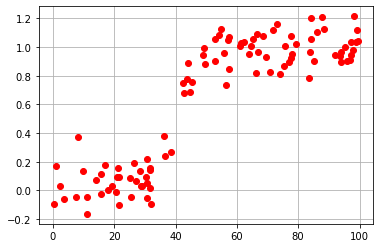

In [6]:
plt.plot(xdata, ydata, 'ro', alpha=1)
plt.grid()
plt.show()


So here each dot is a data point, a combination of $x$ together with a measurement of the corresponding $\sigma(x,\beta_1,\beta_2)$. Conclude that these measurements can not be 100% accurate. 

Below we will try to find estimates of $\beta_1,\beta_2$ to find an estimate $\hat{\sigma}$ for $\sigma$. 
The available data are the 100 data points of type $(x_i,\sigma(x_i,\beta_1,\beta_2)+\epsilon_i)$ that were used to create the above plot. So for $x$ values, the corresponding $y$ value is a function value $\sigma(x,\beta_1,\beta_2)$ plus noise. 

We will now try to find the values of the parameters $\beta_1,\beta_2)$ that fit the data best. In order to do so we need to solve an optimization problem.

Although we may define 'best' approximations in very different ways (see written Assignment 1), we here aim at minimizing the cost function 

$$C(\beta,X,Y)=\Vert Y-\sigma(X,\beta)\Vert^2 
$$

for the values in a data set $(X,Y)$. Note that here $\sigma(X)$ denotes a vector $(\sigma(x_1,\beta) \cdots \sigma(x_m,\beta))$ if $X=(x_1 \cdots x_m)$.
For the given data set with input values $X_{data}$ and corresponding function values $Y_{data}$, the relevant function becomes
  

$$\mathcal{L}(\beta)=\Vert Y_{data}-\sigma(X_{data},\beta)\Vert^2, 
$$

where $\sigma(\cdot,\beta)$ is applied to each coordinate in $X_{data}$.



In [7]:
## Graded Exercise
# Transform xdata to np.array X_data and ydata to np.array Y_data

# YOUR CODE HERE
X_data=np.array(xdata)
Y_data=np.array(ydata)

Make sure you have the right types! 

In [8]:
# GRADED EXERCISE: define cost function


## Function ###
# Define function 'cost'
# cost(beta_param,x,y):
# input: beta_param (2,) vector
#        x numpy array, (m,) vector
#        y numpy array, (m,) vector
# output: the quantity specified in the explanation
def cost(beta_param,x=X_data,y=Y_data):
    # YOUR CODE HERE
    return linalg.norm(y-sigma(x,beta_param[0],beta_param[1]))**2


Check your function. For parameters $\beta=(1,1)$ and the given data, you should obtain a cost of 355492.73824173457. 

In [9]:
'''Test-cell'''
cost(beta_param=[1,1],x=X_data,y=Y_data)

32.07242082445513

A: The provided answer is wrong.

In [10]:
# GRADED EXERCISE: define loss function
# Define function loss(beta_param)
# input vector beta_param with beta_1, beta_2 as coordinates
# output the total loss at the values

# YOUR CODE HERE
def loss(beta_param):
    # YOUR CODE HERE
    return linalg.norm(Y_data-sigma(X_data,beta_param[0],beta_param[1]))**2


Check your function. At $\beta=(1,2)$ your loss should be around 31.37.

In [119]:
loss([1,2])

48 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


A: Yes, if you round to 2 d.p. it is the same.


In [52]:
# GRADED EXERCISE: find the optimal values for beta

## Use scipy.minimize to optimize the loss function
# input: loss, use starting point [1,2]
# output: 'result' which is the scipy.minimize object
# output: 'beta_opt' (2,) vector of optimal values for beta_1,beta_2

# YOUR CODE HERE
result=spo.minimize(loss,[1,2],method="BFGS")
beta_opt=result.x


In [46]:
beta_opt

array([ 0.28322607, 39.91174358])

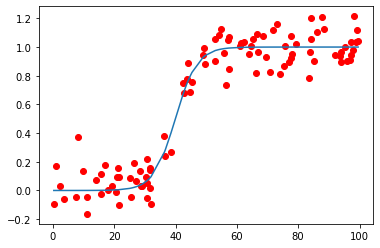

In [50]:
plt.plot(xdata,ydata,"ro",alpha=1)
plt.plot(X_data,sigma(X_data,beta_opt[0],beta_opt[1]))
plt.show();


Check your solution. If you plot your estimated function with the data, do you get something like this?

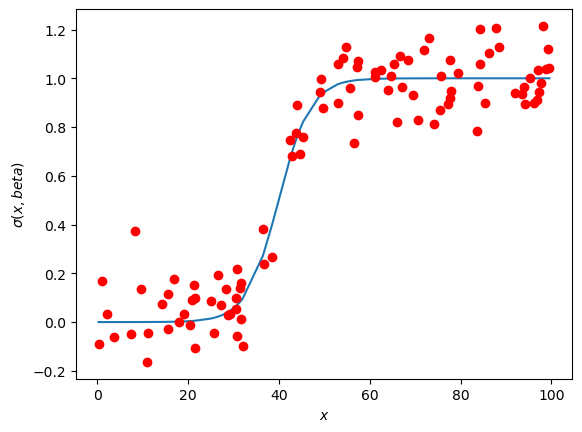

Now we will calculate the Hessian matrix $H\mathcal{L}$ at the solution you found to guarantee that indeed it minimizes loss. 

* Use <code> numdifftools </code> to evaluate the Hessian at the solution. 
* Use <code> np.linalg </code> to find the eigenvalues


In [53]:
# GRADED EXERCISE: check the Hessian at optimum

# Calculate the gradient and Hessian H at beta_opt.
# grad = 
# H =

# YOUR CODE HERE
grad=nd.Gradient(loss)(beta_opt)
print("Gradient:\n",grad)
H=nd.Hessian(loss)(beta_opt)
print("Hessian:\n",H)


Gradient:
 [-1.33255837e-07  5.06910229e-10]
Hessian:
 [[16.11294024 -0.1221102 ]
 [-0.1221102   0.066981  ]]


In [150]:
## GRADED EXERCISE

# Calculate the eigenvalues of H
#     eig =
# Characterize type of H
#     type = 'pos def' if positive definite
#     type = 'neg def' if negative definite
#     type = 'indefinite' if indefinite

# YOUR CODE HERE
eig=np.linalg.eigvals(H)
signs=2*(eig>0)+(eig==0)-1
["neg def","indefinite","indefinite","indefinite","pos def"][int(2+np.sum(signs))]
#the more I think about it the more I start to doubt whether it will scale efficiently, but it is cool way to solve anyway


'pos def'

In [153]:
#this is here to create a scaled environment of to check which is faster. Am I being stupid at this point? Maybe...
eig=np.random.normal(0,1,1000000)

In [154]:
%%timeit
#more scalable way to determine type 
#eig=np.linalg.eigvals(H)
n=len(eig)
signs=2*(eig>0)+(eig==0)-1
if np.sum(signs)==n:
    type2="pos def"
elif np.sum(signs)==-n:
    type2="neg def"
else:
   type2="indefinite"
type2
#this works regardless of the dimension of the hessian

12.4 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [155]:
%%timeit
#eig=np.linalg.eigvals(H)
#so we already have a pretty robust method, but let's make it more elegant
indicator=np.sum(2*(eig>0)+(eig==0)-1)/len(eig)
["","pos def","neg def"][int(indicator)] if abs(indicator)==1 else "indefinite"
#now, this is what I am talking about! It will work for all values and dimesions as long as they are real valued

11.9 ms ± 450 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Now suppose that your friend gives you additional information bout $\beta=(\beta_1,\beta_2)$, and that $\beta_1,\beta_2$ must be such that

* $\beta_1\geq 1$
* $\Vert\beta\Vert^2\leq 20$. 

Use <code>scipy.minimize</code> with starting point $\beta=(1,2)$ to find the optimal $\beta$ that minimizes the loss function subject to these constraints.  Use the 'SLSQP' solver. 

In [157]:
%%timeit
# GRADED EXERCISE: optimize given constraints on beta

# Write code, such that you obtain (2,) vector 'beta_restrict_opt' as the solution
#   write constraints as tuple 'cons'
#       cons = 
# Return object 'result_restricted'
#       result_restricted = 
# Get the optimal values
#       beta_restrict_opt = 

# YOUR CODE HERE
result_restriced=spo.minimize(loss,[1,2],method="SLSQP",constraints=({"fun": lambda x: x[0]-1,"type":'ineq'},{"fun": lambda x:20-np.dot(x,x),"type":'ineq'}))
beta_restrict_opt=result_restriced.x

12.6 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#12.6 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

In [42]:
beta_restrict_opt

array([1.        , 4.35889895])

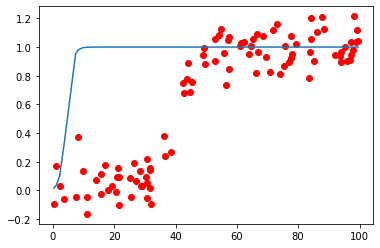

In [43]:
plt.plot(xdata,ydata,"ro",alpha=1)
plt.plot(X_data,sigma(X_data,beta_restrict_opt[0],beta_restrict_opt[1]))
plt.show();

Q: Check your solution. Do you think your friend provided trustworthy information?

A: No, maybe the friend meant just $\Vert\beta\Vert\leq 20$. Silly friend...

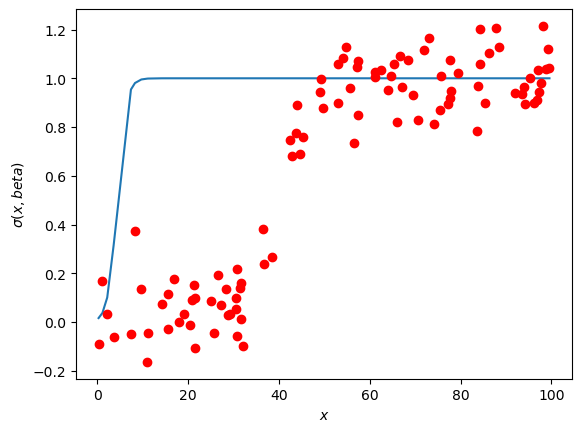